## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

The purpose of this study is to help an e-commerce company to understand the results of an experiment.  The experiment compared the current web page to a new design to understand if it will drive viewers of the web page to convert (sign-up) at a higher rate than under the current design.  Since this study was conducted as a random experiment. Findings are assumed to have causality.

Project data for this study was supplied by Udacity at the following url:

https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/f7f4edf8-b54d-488f-afb7-e8ec2a0819ca/lessons/7b40dff8-3bcd-4145-8dca-d706ae48bd56/concepts/342cafa6-73f1-4226-b4ed-0171ff5bf81d

Techniques used to analyze this data were learned from Udacity in the Practical Statistics module, located a the following url:

https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
num_rows = df.count().timestamp
print('The number of rwos in the dataset =', num_rows)

The number of rwos in the dataset = 294478


c. The number of unique users in the dataset.

In [4]:
num_unique = df.nunique().user_id
print('The number of unique userids =', num_unique)

The number of unique userids = 290584


d. The proportion of users converted.

In [5]:
prop_converted = (df.converted==1).mean()
print('The proportion of users converted =',prop_converted)

The proportion of users converted = 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
old_page = ((df.group=='treatment') & 
            (df.landing_page=='old_page')).sum()
new_page = ((df.group=='control') & 
            (df.landing_page=='new_page')).sum()
num_pg_mismatch = old_page + new_page
num_pg_mismatch

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> The row numbers for eah variable appear to match, therefore, there are no missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df['does_not_match']=((df.group=='treatment') & 
            (df.landing_page=='old_page')) |((df.group=='control') & 
            (df.landing_page=='new_page'))

df.head()


,user_id,timestamp,group,landing_page,converted,does_not_match
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


In [9]:
df['does_not_match'].value_counts()

False    290585
True       3893
Name: does_not_match, dtype: int64

In [10]:
df2 = df.query('does_not_match == False')

In [11]:
df2.head()

,user_id,timestamp,group,landing_page,converted,does_not_match
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
num_uid = df2.user_id.nunique()
print('The number of unique user_id in df2 =', num_uid)

The number of unique user_id in df2 = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2['user_id'].value_counts().sort_values(ascending=False).head()

773192    2
639032    1
663620    1
778364    1
645179    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted,does_not_match
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


In [16]:
df2 = df2.drop_duplicates('user_id', inplace = False)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted,does_not_match
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
individual_prob = (df2['converted']).mean()
print('Individual converting probability =', individual_prob)

Individual converting probability = 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
cont_prob_of_conversion = (df2.query('group == "control"')['converted']).mean()
print('The probability of individual in control group converting = ',cont_prob_of_conversion)

The probability of individual in control group converting =  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
treat_prob_of_conversion = (df2.query('group == "treatment"')['converted']).mean()
print('The probability of individual in treatment group converting =',treat_prob_of_conversion)

The probability of individual in treatment group converting = 0.11880806551510564


d. What is the probability that an individual received the new page?

In [21]:
prob_new_landing = (df2['landing_page'] == 'new_page').mean()
print('Probability of receiving new landing page =', prob_new_landing)

Probability of receiving new landing page = 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> There is approximately 0.16% difference between the control group  and the new treatment group when it comes to conversions.  It is not apparent from the evidence, above, if that is significant.  At this stage, it requires further analysis.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0:  P_{new} - P_{old} >= 0$$
$$ $$
$$H_1:  P_{new} - P_{old} < 0$$

$$\alpha = 0.05$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = (df2['converted']).mean()
print('The conversion rate for p_new = ',p_new)

The conversion rate for p_new =  0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = (df2['converted']).mean()
print('The conversion rate for p_old = ',p_old)

The conversion rate for p_old =  0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new_treatment = (df2['landing_page'] == 'new_page').sum()
print('Number of n_new = ', n_new_treatment)

Number of n_new =  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old_treatment = (df2['landing_page'] == 'old_page').sum()
print('Number of n_old = ', n_old_treatment)

Number of n_old =  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
n_new = n_new_treatment
new_page_converted=np.random.choice([0,1],size=n_new, p=[1-p_new,p_new])
print('n_new = ', n_new)
print('new_page_converted mean = ', new_page_converted.mean())

n_new =  145310
new_page_converted mean =  0.12087261716330604


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
n_old = n_old_treatment
old_page_converted=np.random.choice([0,1],size=n_new, p=[1-p_old,p_old])
print('n_old = ', n_old)
print('old_page_converted mean = ', old_page_converted.mean())

n_old =  145274
old_page_converted mean =  0.11987475053334251


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
diff_p = (new_page_converted.mean() - old_page_converted.mean())
print('Pnew minus Pold = ', diff_p)

Pnew minus Pold =  0.0009978666299635258


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
diff_p_mean = diff_p.mean()
diff_p_mean

0.0009978666299635258

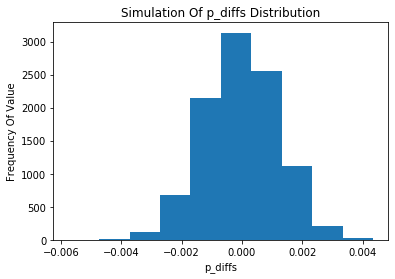

In [31]:
plt.hist(p_diffs)
plt.title('Simulation Of p_diffs Distribution')
plt.ylabel('Frequency Of Value')
plt.xlabel('p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
act_obs = (p_diffs > obs_diff).mean()
print('The proportion of p_diffs that are greater than the actual difference observed in ab_data.csv = ',act_obs)

The proportion of p_diffs that are greater than the actual difference observed in ab_data.csv =  0.9019


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> The value we just calculated is called the p-value in scientific studues.  Looking at the proportion of p_diffs that are greater than the actual differences, we see the value calculated is .9035.  That means that 90% of simulated differences are greater than the actual differences.  Therefore, we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = (df2.query('landing_page == "old_page"')['converted']==1).sum()
convert_new = (df2.query('landing_page == "new_page"')['converted']==1).sum()
n_old = (df2['landing_page'] == 'old_page').sum()
n_new = (df2['landing_page'] == 'new_page').sum()
print('convert_old = ', convert_old)
print('convert_new = ', convert_new)
print('n_old       = ', n_old)
print('n_new       = ', n_new)

convert_old =  17489
convert_new =  17264
n_old       =  145274
n_new       =  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_test , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
p_val = 1-p_value

> Since we are looking at the higher end of a 1 sided p-test, we will need to subtract 1 from the value obtained above to obtain the p-test value.

In [35]:
print('The p-test value =  ', p_value, 'and the z-test = ', z_test)

The p-test value =   0.09494168724097551 and the z-test =  1.3109241984234394


In [36]:
# define probability -- selected 0.025 due to this being a 1-sided test.
p = 0.95  
# retrieve critical value <= probability 
cval = st.norm.ppf(p)
print('The critical value for the z-score = ',cval)

The critical value for the z-score =  1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>Evaluating the z-test, 1.31 is smaller  than the value of critical value of 1.64.  Looking at the p-value, 0.09 exceeds the 0.05, therefore, we fail to reject the null hypothesis, 
>
> Note:  The code to calculate z-test and 95% confidence interval value was obtained from Sarthak G https://knowledge.udacity.com/questions/195459, identifynig critical value for ztest - Sarthak G at https://knowledge.udacity.com/questions/257302 and from 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Since conversion is "conversion/no conversion" (a 1 or zero value), we should use the Logistic Regression capability.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,does_not_match,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        09:33:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

> To inerpret results, we need to exponentiate the coefficients.

In [39]:
ab_pg = np.exp(-0.0150)

print('The ab_page = ', 1/ab_pg)

The ab_page =  1.015113064615719


In [40]:
print((1-.905)*2)

0.18999999999999995


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

> In this model, we compared the effect of page type (old or new) on the likelihood to convert. The p-value associated with the ab_page from the Logistic regression is 0.190 which is not significant.  In this study, the p-value associated with the ab_page (0.189) was different than the p-value associated with the ab_pageb(.095) in Part II.  The Logistic regression model p-value is approximately twice the value calculated in Part II.  The reason for the difference is the Logistic regression uses a two-tailed test.  
>
>Based on the p-test results for the Logistic regression and the diff analysis, we would fail to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> It is important to consider other factors that may influence if an individual converts.  Often, these factors may have different levels of influence on the dependent variable.  You will not know if they have an effect unless you consider them.  There are disadvantages to adding additional terms.  You need to watch out to ensure that your independent variables are not correlated with each other.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
country_file = pd.read_csv('countries.csv')
country_file.head()
country_file['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [42]:
df2 = pd.merge(df2, country_file, on = ['user_id'])
df2.head()

,user_id,timestamp,group,landing_page,converted,does_not_match,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US


In [43]:
df2[['UK', 'US']] = pd.get_dummies(df2['country'])[['UK','US']]
df2.head()

,user_id,timestamp,group,landing_page,converted,does_not_match,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US,0,1


In [44]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        09:34:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

> To inerpret results, we need to exponentiate the coefficients.

In [45]:
UKval = np.exp(0.0507)
USval = np.exp(-0.0150)

print('UK Coefficient = ', UKval)
print('US Coefficient = ', USval)

UK Coefficient =  1.052007243765014
US Coefficient =  0.9851119396030626


> Although we evaluated country in the model, we see that the p-values for the countries are greater than 0.05.  In this model, we compared the effect on country of origin on the likelihood to convert. The baseline is Canada (CA).  Since the p-values are greater than 0.05, they are not statistically signficant and we would fail to reject the null hypothesis.  

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results

In [46]:
df2['US_ab_page'] = df2['US'] * df2['ab_page']
df2['UK_ab_page'] = df2['UK'] * df2['ab_page']

In [47]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'US_ab_page', 'UK_ab_page','UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        09:34:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

> In this Logistic regression, we looked at the effects of page and country on conversion.  As we can see, the p-values are still greater than 0.05 for page and country.  Therefore, we would fail reject the null hypothesis. 

In [48]:
df['timestamp'].max(), df['timestamp'].min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

> Looking at the maximum and minimum dates of the study, it was held from January 2 through January 24, 2017.  As it does not include a full month and the month of the year may also have an effect, I did not pursue additional analysis of time as a factor affecting conversion.  Further analysis could include an analysis of the impact of time on conversion rates.

<a id='conclusions'></a>
## Conclusion

> This study conducted an A/B analysis of a website, evaluating if a newer version of the web page would drive additional users to convert (click to take a course).  Since this study was conducted as a random experiment. Findings are assumed to have causality.

Here is a summary of descriptive statistics for this analysis:
>
> Total number of rows in the dataset:  294,478
> Unique number of users in the dataset: 290,584
> Proportion of users converted in the dataset regardless of page they received:  11.96%
> Rows where treatment type (control or treatment did not match landing page (old page or newer page): 3893.  These were removed from the dataset.
> One duplicate record was found and removed from the datset.
> Despite a 50% probability of receiving the new landing page, there was only a 0.16% difference in means for both the control and treatment groups.
>
> An A/B test was conducted, comparing the differnce in control and treatment means to the difference in a randomly created sample distribution of means.  The difference analysis found that 90.35% of the differences in the sample means were greater than the actual difference between the control and treatment means.  
>
> The p-test value was found to be 0.09 and the z-test was found to be 1.31.  The critical value for a one-sided p-test is 0.05 (alpha) and the critical value for the z-test was 1.65.  Since these values exceed the critical values, we conclude that the difference is not statistically significant.
>
>Regression Analysis
>
> Logistic Regression was conducted on the data.  First, the effect of the page (new or old) was evaluated against the dependent variable (conversion).  Results were found to not be statistically significant.  Next, country data (Canada, United States and United Kingdom were evaluated against the dependent variable.  These results also were not statistically significant.  Finally, the effect of the page and country were evaluated against the dependent variable.  These results were also found to lack statistical significance.  
>
> While date was provided, I chose not to evaluate it.  The study was conducted between January 2 and January 24, 2017.  It is recommended that the effect of time on conversion be evaluated in future studies.
>
>In conclusion, the new page did not appear to have an effect on the individual's likelihood to convert.  Therefore, we fail to reject the null hypothesis and recommend that the company does not implement the new web page.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0